Get the Data

In [ ]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2022-06-13 12:45:05--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2022-06-13 12:45:05--  https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia601802.us.archive.org (ia601802.us.archive.org)... 207.241.227.72
Connecting to ia601802.us.archive.org (ia601802.us.archive.org)|207.241.227.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2022-06-13 12:45:05 (330 MB/s) - ‘AgesAndHeights.pkl’ saved [2406/2406]



In [ ]:
import pandas as pd
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffac60ac550>,
      dtype=object)

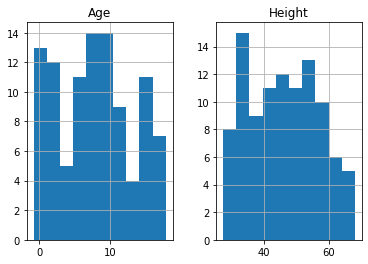

In [ ]:
raw_data.hist()

In [ ]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [ ]:
cleaned_data = raw_data[raw_data['Age'] > 0]
cleaned_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [ ]:
cleaned_data.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


Visualizing the Cleaned Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffac3c8d490>,
      dtype=object)

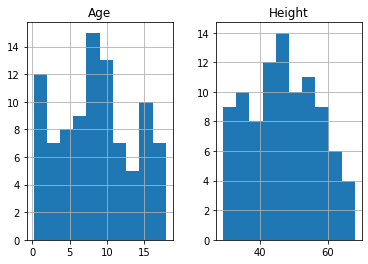

In [ ]:
cleaned_data.hist()

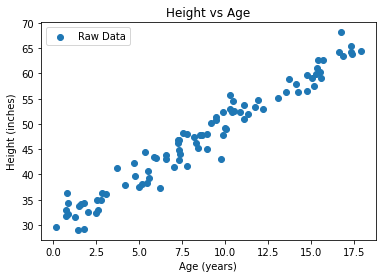

In [ ]:
import matplotlib.pyplot as plt
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages , heights , label = 'Raw Data')
plt.title('Height vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (inches)')
plt.legend()

Build the Model and Train it!

In [ ]:
y = alpha + beta * x + epsilon
y_hat = alpha + beta * x 

In [ ]:
parameters = {'alpha' : 40 , 'beta' : 4}

In [ ]:
def y_hat(age , params):
  alpha = params['alpha']
  beta = params['beta']
  return alpha + beta * age
y_hat(5 , parameters)

60

In [ ]:
def learn_parameters(data , params):
  x , y = data['Age'] , data['Height']
  x_bar , y_bar = x.mean() , y.mean()
  x , y = x.to_numpy() , y.to_numpy()
  beta = sum( ((x-x_bar) * (y-y_bar)) / sum( (x-x_bar)**2))
  alpha = y_bar - beta*x_bar
  params['alpha'] = alpha
  params['beta'] = beta

In [ ]:
spaced_ages = list(range(18))
spaced_ages
spaced_untrained_prediction = [y_hat(x, parameters) for x in spaced_ages]
spaced_untrained_prediction

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108]

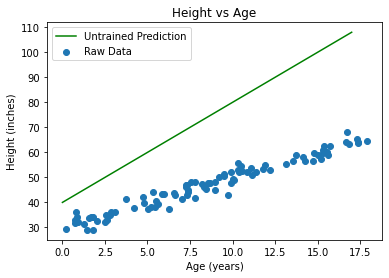

In [ ]:
import matplotlib.pyplot as plt
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages , heights , label = 'Raw Data')
plt.plot(spaced_ages , spaced_untrained_prediction, label = 'Untrained Prediction' , color = 'green')
plt.title('Height vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (inches)')
plt.legend()

In [ ]:
new_parameters = {'alpha' : 0 , 'beta' : 0}
learn_parameters(cleaned_data , new_parameters)
new_parameters

{'alpha': 29.961857614615834, 'beta': 2.0014168989106302}

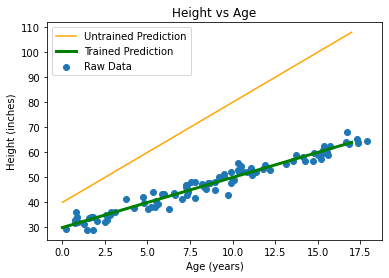

In [ ]:
spaced_trained_prediction = [y_hat(x, new_parameters) for x in spaced_ages]
plt.scatter(ages , heights , label = 'Raw Data')
plt.plot(spaced_ages , spaced_untrained_prediction, label = 'Untrained Prediction' , color = 'orange')
plt.plot(spaced_ages , spaced_trained_prediction, label = 'Trained Prediction' , color = 'green', lw = 3)
plt.title('Height vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (inches)')
plt.legend()

Use the Model - Make some Predictions on UNSEEN Data

In [ ]:
new_age = 5
y_hat(new_age, new_parameters)

39.968942109168985